In [1]:
import tensorflow as tf
import numpy as np
import mlp.tf_utils as utils
from mlp.data_providers import AugmentedCIFAR10DataProvider, AugmentedCIFAR100DataProvider, CIFAR100DataProvider, CIFAR10DataProvider
from mlp.image_transforms import random_flip, random_crop, center_crop, random_flip_small
from mlp.Conv_models import ConvModel, TwoTaskConvModel, TwoTaskConvModelSoftSharing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

seed = 12345 
rng = np.random.RandomState(seed)

In [2]:
#### event file dirs #####

baseline_CIFAR_10_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/baseline_CIFAR10_with_1.0_of_the_data/2017-06-23_05-12-24/train/events.out.tfevents.1498191144.ben-desktop"
baseline_CIFAR_10_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/baseline_CIFAR10_with_1.0_of_the_data/2017-06-23_05-12-24/valid/events.out.tfevents.1498191144.ben-desktop"

baseline_CIFAR_100_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/baseline_with_1.0_of_the_data/2017-06-26_15-57-29/train/events.out.tfevents.1498489049.ben-desktop"
baseline_CIFAR_100_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/baseline_with_1.0_of_the_data/2017-06-26_15-57-29/valid/events.out.tfevents.1498489049.ben-desktop"

mtl_soft_loss_1_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_12-17-35/train/events.out.tfevents.1498216656.ben-desktop"
mtl_soft_loss_1_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_12-17-35/valid/events.out.tfevents.1498216656.ben-desktop"
mtl_soft_loss_1_dir_other = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_12-17-35/other/events.out.tfevents.1498216656.ben-desktop"

mtl_soft_loss_0_1_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_00-20-19/train/events.out.tfevents.1498173620.ben-desktop"
mtl_soft_loss_0_1_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_00-20-19/valid/events.out.tfevents.1498173620.ben-desktop"
mtl_soft_loss_0_1_dir_other = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_00-20-19/other/events.out.tfevents.1498173620.ben-desktop"

mtl_soft_loss_0_01_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_01-13-23/train/events.out.tfevents.1498176803.ben-desktop"
mtl_soft_loss_0_01_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_01-13-23/valid/events.out.tfevents.1498176803.ben-desktop"
mtl_soft_loss_0_01_dir_other = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_01-13-23/other/events.out.tfevents.1498176803.ben-desktop"

mtl_soft_loss_0_001_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_02-06-14/train/events.out.tfevents.1498179974.ben-desktop"
mtl_soft_loss_0_001_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_02-06-14/valid/events.out.tfevents.1498179974.ben-desktop"
mtl_soft_loss_0_001_dir_other = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_02-06-14/other/events.out.tfevents.1498179975.ben-desktop"

mtl_soft_loss_0_0001_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_02-58-55/train/events.out.tfevents.1498183136.ben-desktop"
mtl_soft_loss_0_0001_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_02-58-55/valid/events.out.tfevents.1498183136.ben-desktop"
mtl_soft_loss_0_0001_dir_other = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_02-58-55/other/events.out.tfevents.1498183136.ben-desktop"

mtl_soft_loss_0_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_04-19-45/train/events.out.tfevents.1498187986.ben-desktop"
mtl_soft_loss_0_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_04-19-45/valid/events.out.tfevents.1498187986.ben-desktop"
mtl_soft_loss_0_dir_other = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_04-19-45/other/events.out.tfevents.1498187986.ben-desktop"

In [3]:
print("############# BASELINE_CIFAR_10_TRAIN ###########")
print("")
print("")
baseline_CIFAR_10_stats_train = utils.event_file_to_stats_dict(baseline_CIFAR_10_dir_train)
print("ACCURACIES")
baseline_CIFAR_10_acc_train = utils.only_stats_with_keyword(baseline_CIFAR_10_stats_train, "accuracy")
print(baseline_CIFAR_10_acc_train.keys())
print("")
print("ERRORS")
baseline_CIFAR_10_error_train = utils.only_stats_with_keyword(baseline_CIFAR_10_stats_train, "error")
print(baseline_CIFAR_10_error_train.keys())
print("")
print("")

print("####### BASELINE_CIFAR_10_VALID ##########")
print("")
print("")
baseline_CIFAR_10_stats_valid = utils.event_file_to_stats_dict(baseline_CIFAR_10_dir_valid)
print("ACCURACIES")
baseline_CIFAR_10_acc_valid = utils.only_stats_with_keyword(baseline_CIFAR_10_stats_valid, "accuracy")
print(baseline_CIFAR_10_acc_valid.keys())
print("")
print("ERRORS")
baseline_CIFAR_10_error_valid = utils.only_stats_with_keyword(baseline_CIFAR_10_stats_valid, "error")
print(baseline_CIFAR_10_error_valid.keys())
print("")
print("")

############# BASELINE_CIFAR_10_TRAIN ###########


ACCURACIES
['baseline_CIFAR10_with_1.0_of_the_data_accuracy']

ERRORS
['baseline_CIFAR10_with_1.0_of_the_data_soft_max_cross_entropy_error', 'baseline_CIFAR10_with_1.0_of_the_data_l2_error', 'baseline_CIFAR10_with_1.0_of_the_data_total_error']


####### BASELINE_CIFAR_10_VALID ##########


ACCURACIES
['baseline_CIFAR10_with_1.0_of_the_data_accuracy']

ERRORS
['baseline_CIFAR10_with_1.0_of_the_data_soft_max_cross_entropy_error', 'baseline_CIFAR10_with_1.0_of_the_data_l2_error', 'baseline_CIFAR10_with_1.0_of_the_data_total_error']




In [4]:


print("############# BASELINE_CIFAR_100_TRAIN ###########")
print("")
print("")
baseline_CIFAR_100_stats_train = utils.event_file_to_stats_dict(baseline_CIFAR_100_dir_train)
print("ACCURACIES")
baseline_CIFAR_100_acc_train = utils.only_stats_with_keyword(baseline_CIFAR_100_stats_train, "accuracy")
print(baseline_CIFAR_100_acc_train.keys())
print("")
print("ERRORS")
baseline_CIFAR_100_error_train = utils.only_stats_with_keyword(baseline_CIFAR_100_stats_train, "error")
print(baseline_CIFAR_100_error_train.keys())
print("")
print("")

print("####### BASELINE_CIFAR_100_VALID ##########")
print("")
print("")
baseline_CIFAR_100_stats_valid = utils.event_file_to_stats_dict(baseline_CIFAR_100_dir_valid)
print("ACCURACIES")
baseline_CIFAR_100_acc_valid = utils.only_stats_with_keyword(baseline_CIFAR_100_stats_valid, "accuracy")
print(baseline_CIFAR_100_acc_valid.keys())
print("")
print("ERRORS")
baseline_CIFAR_100_error_valid = utils.only_stats_with_keyword(baseline_CIFAR_100_stats_valid, "error")
print(baseline_CIFAR_100_error_valid.keys())
print("")
print("")

print("####### MTL_SOFT_LOSS_1_TRAIN ##########")
print("")
print("")
mtl_soft_loss_1_stats_train = utils.event_file_to_stats_dict(mtl_soft_loss_1_dir_train)
print("ACCURACIES")
mtl_soft_loss_1_acc_train = utils.only_stats_with_keyword(mtl_soft_loss_1_stats_train, "accuracy")
print(mtl_soft_loss_1_acc_train.keys())
print("")
print("ERRORS")
mtl_soft_loss_1_error_train = utils.only_stats_with_keyword(mtl_soft_loss_1_stats_train, "error")
print(mtl_soft_loss_1_error_train.keys())
print("")
print("")

print("####### MTL_SOFT_LOSS_1_VALID ##########")
print("")
print("")
mtl_soft_loss_1_stats_valid = utils.event_file_to_stats_dict(mtl_soft_loss_1_dir_valid)
print("ACCURACIES")
mtl_soft_loss_1_acc_valid = utils.only_stats_with_keyword(mtl_soft_loss_1_stats_valid, "accuracy")
print(mtl_soft_loss_1_acc_valid.keys())
print("")
print("ERRORS")
mtl_soft_loss_1_error_valid = utils.only_stats_with_keyword(mtl_soft_loss_1_stats_valid, "error")
print(mtl_soft_loss_1_error_valid.keys())
print("")
print("")

print("########## MTL_SOFT_LOSS_1_OTHER ##############")
print("")
print("")
mtl_soft_loss_1_stats_other = utils.event_file_to_stats_dict(mtl_soft_loss_1_dir_other)
print("WEIGHTS DIFF")
mtl_soft_loss_1_diff = utils.only_stats_with_keyword(mtl_soft_loss_1_stats_other, "diff")
print(mtl_soft_loss_1_diff.keys())
print("")
print("")

print("####### MTL_SOFT_LOSS_0_1_TRAIN ##########")
print("")
print("")
mtl_soft_loss_0_1_stats_train = utils.event_file_to_stats_dict(mtl_soft_loss_0_1_dir_train)
print("ACCURACIES")
mtl_soft_loss_0_1_acc_train = utils.only_stats_with_keyword(mtl_soft_loss_0_1_stats_train, "accuracy")
print(mtl_soft_loss_0_1_acc_train.keys())
print("")
print("ERRORS")
mtl_soft_loss_0_1_error_train = utils.only_stats_with_keyword(mtl_soft_loss_0_1_stats_train, "error")
print(mtl_soft_loss_0_1_error_train.keys())
print("")
print("")

print("####### MTL_SOFT_LOSS_0_1_VALID ##########")
print("")
print("")
mtl_soft_loss_0_1_stats_valid = utils.event_file_to_stats_dict(mtl_soft_loss_0_1_dir_valid)
print("ACCURACIES")
mtl_soft_loss_0_1_acc_valid = utils.only_stats_with_keyword(mtl_soft_loss_0_1_stats_valid, "accuracy")
print(mtl_soft_loss_0_1_acc_valid.keys())
print("")
print("ERRORS")
mtl_soft_loss_0_1_error_valid = utils.only_stats_with_keyword(mtl_soft_loss_0_1_stats_valid, "error")
print(mtl_soft_loss_0_1_error_valid.keys())
print("")
print("")

print("########## MTL_SOFT_LOSS_0_1_OTHER ##############")
print("")
print("")
mtl_soft_loss_0_1_stats_other = utils.event_file_to_stats_dict(mtl_soft_loss_0_1_dir_other)
print("WEIGHTS DIFF")
mtl_soft_loss_0_1_diff = utils.only_stats_with_keyword(mtl_soft_loss_0_1_stats_other, "diff")
print(mtl_soft_loss_0_1_diff.keys())
print("")
print("")

print("####### MTL_SOFT_LOSS_0_01_TRAIN ##########")
print("")
print("")
mtl_soft_loss_0_01_stats_train = utils.event_file_to_stats_dict(mtl_soft_loss_0_01_dir_train)
print("ACCURACIES")
mtl_soft_loss_0_01_acc_train = utils.only_stats_with_keyword(mtl_soft_loss_0_01_stats_train, "accuracy")
print(mtl_soft_loss_0_01_acc_train.keys())
print("")
print("ERRORS")
mtl_soft_loss_0_01_error_train = utils.only_stats_with_keyword(mtl_soft_loss_0_01_stats_train, "error")
print(mtl_soft_loss_0_01_error_train.keys())
print("")
print("")

print("####### MTL_SOFT_LOSS_0_01_VALID ##########")
print("")
print("")
mtl_soft_loss_0_01_stats_valid = utils.event_file_to_stats_dict(mtl_soft_loss_0_01_dir_valid)
print("ACCURACIES")
mtl_soft_loss_0_01_acc_valid = utils.only_stats_with_keyword(mtl_soft_loss_0_01_stats_valid, "accuracy")
print(mtl_soft_loss_0_01_acc_valid.keys())
print("")
print("ERRORS")
mtl_soft_loss_0_01_error_valid = utils.only_stats_with_keyword(mtl_soft_loss_0_01_stats_valid, "error")
print(mtl_soft_loss_0_01_error_valid.keys())
print("")
print("")

print("########## MTL_SOFT_LOSS_0_01_OTHER ##############")
print("")
print("")
mtl_soft_loss_0_01_stats_other = utils.event_file_to_stats_dict(mtl_soft_loss_0_01_dir_other)
print("WEIGHTS DIFF")
mtl_soft_loss_0_01_diff = utils.only_stats_with_keyword(mtl_soft_loss_0_01_stats_other, "diff")
print(mtl_soft_loss_0_01_diff.keys())
print("")
print("")


print("####### MTL_SOFT_LOSS_0_001_TRAIN ##########")
print("")
print("")
mtl_soft_loss_0_001_stats_train = utils.event_file_to_stats_dict(mtl_soft_loss_0_001_dir_train)
print("ACCURACIES")
mtl_soft_loss_0_001_acc_train = utils.only_stats_with_keyword(mtl_soft_loss_0_001_stats_train, "accuracy")
print(mtl_soft_loss_0_001_acc_train.keys())
print("")
print("ERRORS")
mtl_soft_loss_0_001_error_train = utils.only_stats_with_keyword(mtl_soft_loss_0_001_stats_train, "error")
print(mtl_soft_loss_0_001_error_train.keys())
print("")
print("")

print("####### MTL_SOFT_LOSS_0_001_VALID ##########")
print("")
print("")
mtl_soft_loss_0_001_stats_valid = utils.event_file_to_stats_dict(mtl_soft_loss_0_001_dir_valid)
print("ACCURACIES")
mtl_soft_loss_0_001_acc_valid = utils.only_stats_with_keyword(mtl_soft_loss_0_001_stats_valid, "accuracy")
print(mtl_soft_loss_0_001_acc_valid.keys())
print("")
print("ERRORS")
mtl_soft_loss_0_001_error_valid = utils.only_stats_with_keyword(mtl_soft_loss_0_001_stats_valid, "error")
print(mtl_soft_loss_0_001_error_valid.keys())
print("")
print("")

print("########## MTL_SOFT_LOSS_0_001_OTHER ##############")
print("")
print("")
mtl_soft_loss_0_001_stats_other = utils.event_file_to_stats_dict(mtl_soft_loss_0_001_dir_other)
print("WEIGHTS DIFF")
mtl_soft_loss_0_001_diff = utils.only_stats_with_keyword(mtl_soft_loss_0_001_stats_other, "diff")
print(mtl_soft_loss_0_001_diff.keys())
print("")
print("")

print("####### MTL_SOFT_LOSS_0_0001_TRAIN ##########")
print("")
print("")
mtl_soft_loss_0_0001_stats_train = utils.event_file_to_stats_dict(mtl_soft_loss_0_0001_dir_train)
print("ACCURACIES")
mtl_soft_loss_0_0001_acc_train = utils.only_stats_with_keyword(mtl_soft_loss_0_0001_stats_train, "accuracy")
print(mtl_soft_loss_0_0001_acc_train.keys())
print("")
print("ERRORS")
mtl_soft_loss_0_0001_error_train = utils.only_stats_with_keyword(mtl_soft_loss_0_0001_stats_train, "error")
print(mtl_soft_loss_0_0001_error_train.keys())
print("")
print("")

print("####### MTL_SOFT_LOSS_0_0001_VALID ##########")
print("")
print("")
mtl_soft_loss_0_0001_stats_valid = utils.event_file_to_stats_dict(mtl_soft_loss_0_0001_dir_valid)
print("ACCURACIES")
mtl_soft_loss_0_0001_acc_valid = utils.only_stats_with_keyword(mtl_soft_loss_0_0001_stats_valid, "accuracy")
print(mtl_soft_loss_0_0001_acc_valid.keys())
print("")
print("ERRORS")
mtl_soft_loss_0_0001_error_valid = utils.only_stats_with_keyword(mtl_soft_loss_0_0001_stats_valid, "error")
print(mtl_soft_loss_0_0001_error_valid.keys())
print("")
print("")

print("########## MTL_SOFT_LOSS_0_0001_OTHER ##############")
print("")
print("")
mtl_soft_loss_0_0001_stats_other = utils.event_file_to_stats_dict(mtl_soft_loss_0_0001_dir_other)
print("WEIGHTS DIFF")
mtl_soft_loss_0_0001_diff = utils.only_stats_with_keyword(mtl_soft_loss_0_0001_stats_other, "diff")
print(mtl_soft_loss_0_0001_diff.keys())
print("")
print("")

print("####### MTL_SOFT_LOSS_0_TRAIN ##########")
print("")
print("")
mtl_soft_loss_0_stats_train = utils.event_file_to_stats_dict(mtl_soft_loss_0_dir_train)
print("ACCURACIES")
mtl_soft_loss_0_acc_train = utils.only_stats_with_keyword(mtl_soft_loss_0_stats_train, "accuracy")
print(mtl_soft_loss_0_acc_train.keys())
print("")
print("ERRORS")
mtl_soft_loss_0_error_train = utils.only_stats_with_keyword(mtl_soft_loss_0_stats_train, "error")
print(mtl_soft_loss_0_error_train.keys())
print("")
print("")

print("####### MTL_SOFT_LOSS_0_VALID ##########")
print("")
print("")
mtl_soft_loss_0_stats_valid = utils.event_file_to_stats_dict(mtl_soft_loss_0_dir_valid)
print("ACCURACIES")
mtl_soft_loss_0_acc_valid = utils.only_stats_with_keyword(mtl_soft_loss_0_stats_valid, "accuracy")
print(mtl_soft_loss_0_acc_valid.keys())
print("")
print("ERRORS")
mtl_soft_loss_0_error_valid = utils.only_stats_with_keyword(mtl_soft_loss_0_stats_valid, "error")
print(mtl_soft_loss_0_error_valid.keys())
print("")
print("")

print("########## MTL_SOFT_LOSS_0_OTHER ##############")
print("")
print("")
mtl_soft_loss_0_stats_other = utils.event_file_to_stats_dict(mtl_soft_loss_0_dir_other)
print("WEIGHTS DIFF")
mtl_soft_loss_0_diff = utils.only_stats_with_keyword(mtl_soft_loss_0_stats_other, "diff")
print(mtl_soft_loss_0_diff.keys())
print("")
print("")

############# BASELINE_CIFAR_100_TRAIN ###########


ACCURACIES
['baseline_with_1.0_of_the_data_accuracy']

ERRORS
['baseline_with_1.0_of_the_data_l2_error', 'baseline_with_1.0_of_the_data_total_error', 'baseline_with_1.0_of_the_data_soft_max_cross_entropy_error']


####### BASELINE_CIFAR_100_VALID ##########


ACCURACIES
['baseline_with_1.0_of_the_data_accuracy']

ERRORS
['baseline_with_1.0_of_the_data_l2_error', 'baseline_with_1.0_of_the_data_total_error', 'baseline_with_1.0_of_the_data_soft_max_cross_entropy_error']


####### MTL_SOFT_LOSS_1_TRAIN ##########


ACCURACIES
['MTL_soft_with_1.0_of_the_data_main_accuracy', 'MTL_soft_with_1.0_of_the_data_aux_accuracy']

ERRORS
['MTL_soft_with_1.0_of_the_data_main_error', 'MTL_soft_with_1.0_of_the_data_aux_error']


####### MTL_SOFT_LOSS_1_VALID ##########


ACCURACIES
['MTL_soft_with_1.0_of_the_data_main_accuracy', 'MTL_soft_with_1.0_of_the_data_aux_accuracy']

ERRORS
['MTL_soft_with_1.0_of_the_data_main_error', 'MTL_soft_with_1.0_of_the_

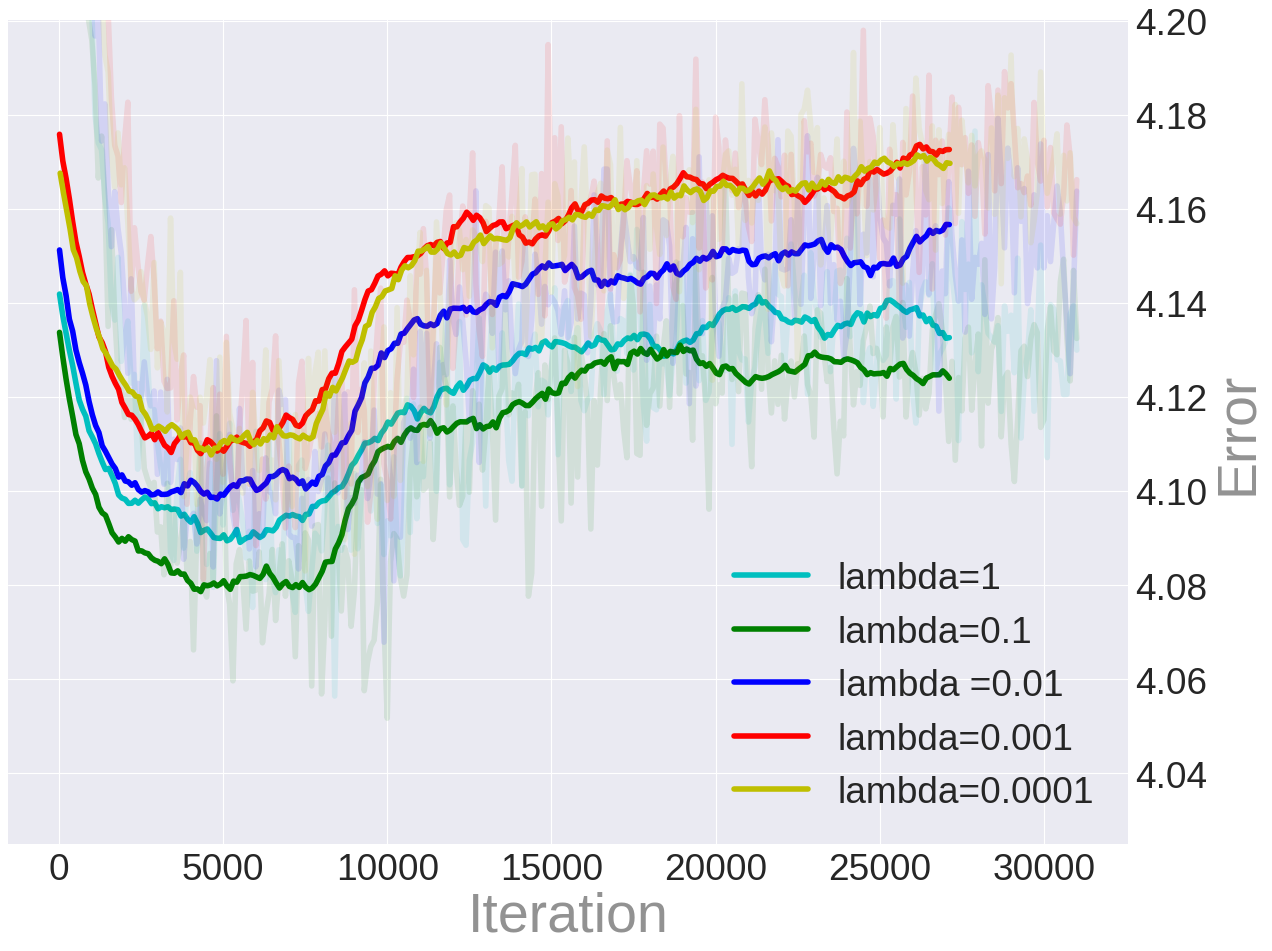

In [28]:
smooth_distance = 20
alpha = 0.1
line_width = 5.0
size=50

plt.figure(figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title("", size=size)
#plt.ylabel("Error", size=size, alpha=0.5)
plt.xlabel("Iteration", size=size,alpha=0.5)

############ Baseline CIFAR 100 ################
lbl = "STL"

y = np.array(baseline_CIFAR_100_error_valid['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 20 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(baseline_CIFAR_100_error_valid['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([10 * i * 20 + smooth_distance for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, label=lbl, linewidth=line_width)


############# MTL soft loss 1 #################
lbl = "lambda=1"

y = np.array(mtl_soft_loss_1_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='c')

y = np.array(mtl_soft_loss_1_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='c')


############# MTL soft loss 0.1 #################
lbl = "lambda=0.1"

y = np.array(mtl_soft_loss_0_1_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='g')

y = np.array(mtl_soft_loss_0_1_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='g')


############# MTL soft loss 0.01 #################
lbl = "lambda =0.01"

y = np.array(mtl_soft_loss_0_01_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='b')

y = np.array(mtl_soft_loss_0_01_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='b')


############# MTL soft loss 0.001 #################
lbl = "lambda=0.001"

y = np.array(mtl_soft_loss_0_001_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='r')

y = np.array(mtl_soft_loss_0_001_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='r')


############# MTL soft loss 0.0001 #################
lbl = "lambda=0.0001"

y = np.array(mtl_soft_loss_0_0001_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='y')

y = np.array(mtl_soft_loss_0_0001_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([smooth_distance + 10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='y')

plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
plt.xticks(size=size/1.5)
plt.yticks(size=size/1.5)
plt.axis(ymax=4.2, ymin=4.025)
ax = plt.gca()
ax.set_ylabel("Error", size=size, alpha=0.5)
ax.yaxis.set_label_position("right")
plt.legend(loc="best",prop={'size':size/1.5})
plt.tight_layout()
plt.savefig("valid_error_lambdas.png", dpi=100)
plt.show()

In [6]:
print("STL:\t{}".format(min(baseline_CIFAR_100_error_valid['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])))
print("1:\t{}".format(min(mtl_soft_loss_1_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])))
print("0.1:\t{}".format(min(mtl_soft_loss_0_1_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])))
print("0.01:\t{}".format(min(mtl_soft_loss_0_01_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])))
print("0.001:\t{}".format(min(mtl_soft_loss_0_001_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])))
print("0.0001:\t{}".format(min(mtl_soft_loss_0_0001_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])))
print("0:\t{}".format(min(mtl_soft_loss_0_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])))

STL:	3.98109173775
1:	4.05639886856
0.1:	4.05169296265
0.01:	4.06785011292
0.001:	4.08120250702
0.0001:	4.08298635483
0:	4.08055639267


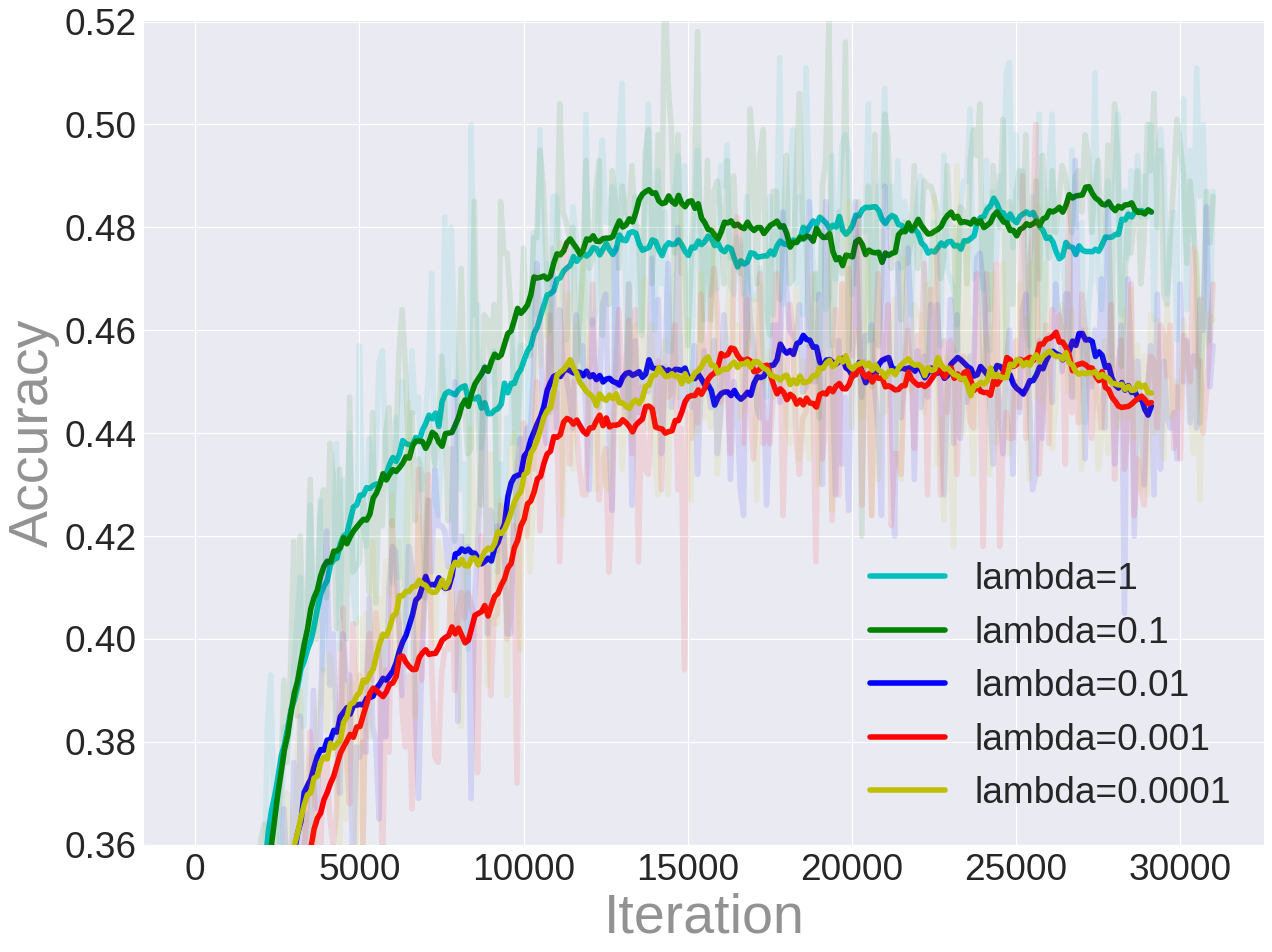

In [41]:
smooth_distance = 20
alpha = 0.1
line_width = 5.0
size=50

plt.figure(figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title("", size=size)
plt.ylabel("Accuracy", size=size, alpha=0.5)
plt.xlabel("Iteration", size=size,alpha=0.5)

############ Baseline CIFAR 100 ################
lbl = "STL"

y = np.array(baseline_CIFAR_100_acc_valid['baseline_with_1.0_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 20 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(baseline_CIFAR_100_acc_valid['baseline_with_1.0_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([10 * i * 20 + smooth_distance for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, label=lbl, linewidth=line_width)


############# MTL soft loss 1 #################
lbl = "lambda=1"

y = np.array(mtl_soft_loss_1_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='c')

y = np.array(mtl_soft_loss_1_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='c')


############# MTL soft loss 0.1 #################
lbl = "lambda=0.1"

y = np.array(mtl_soft_loss_0_1_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='g')

y = np.array(mtl_soft_loss_0_1_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='g')


############# MTL soft loss 0.01 #################
lbl = "lambda=0.01"

y = np.array(mtl_soft_loss_0_01_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='b')

y = np.array(mtl_soft_loss_0_01_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='b')


############# MTL soft loss 0.001 #################
lbl = "lambda=0.001"

y = np.array(mtl_soft_loss_0_001_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='r')

y = np.array(mtl_soft_loss_0_001_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='r')

############# MTL soft loss 0.0001 #################
lbl = "lambda=0.0001"

y = np.array(mtl_soft_loss_0_0001_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='y')

y = np.array(mtl_soft_loss_0_0001_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='y')

plt.xticks(size=size/1.5)
plt.yticks(size=size/1.5)
plt.axis(ymax=0.52, ymin=0.36)
plt.legend(loc="best",prop={'size':size/1.5})
plt.tight_layout()
plt.savefig("valid_accuracy_lambdas.png", dpi=100)
plt.show()

In [8]:
print("STL:\t{}".format(max(baseline_CIFAR_100_acc_valid['baseline_with_1.0_of_the_data_accuracy'])))
print("1:\t{}".format(max(mtl_soft_loss_1_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])))
print("0.1:\t{}".format(max(mtl_soft_loss_0_1_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])))
print("0.01:\t{}".format(max(mtl_soft_loss_0_01_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])))
print("0.001:\t{}".format(max(mtl_soft_loss_0_001_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])))
print("0.0001:\t{}".format(max(mtl_soft_loss_0_0001_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])))
print("0:\t{}".format(max(mtl_soft_loss_0_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])))

STL:	0.469999969006
1:	0.513000011444
0.1:	0.530000030994
0.01:	0.493000000715
0.001:	0.5
0.0001:	0.49200001359
0:	0.503999948502


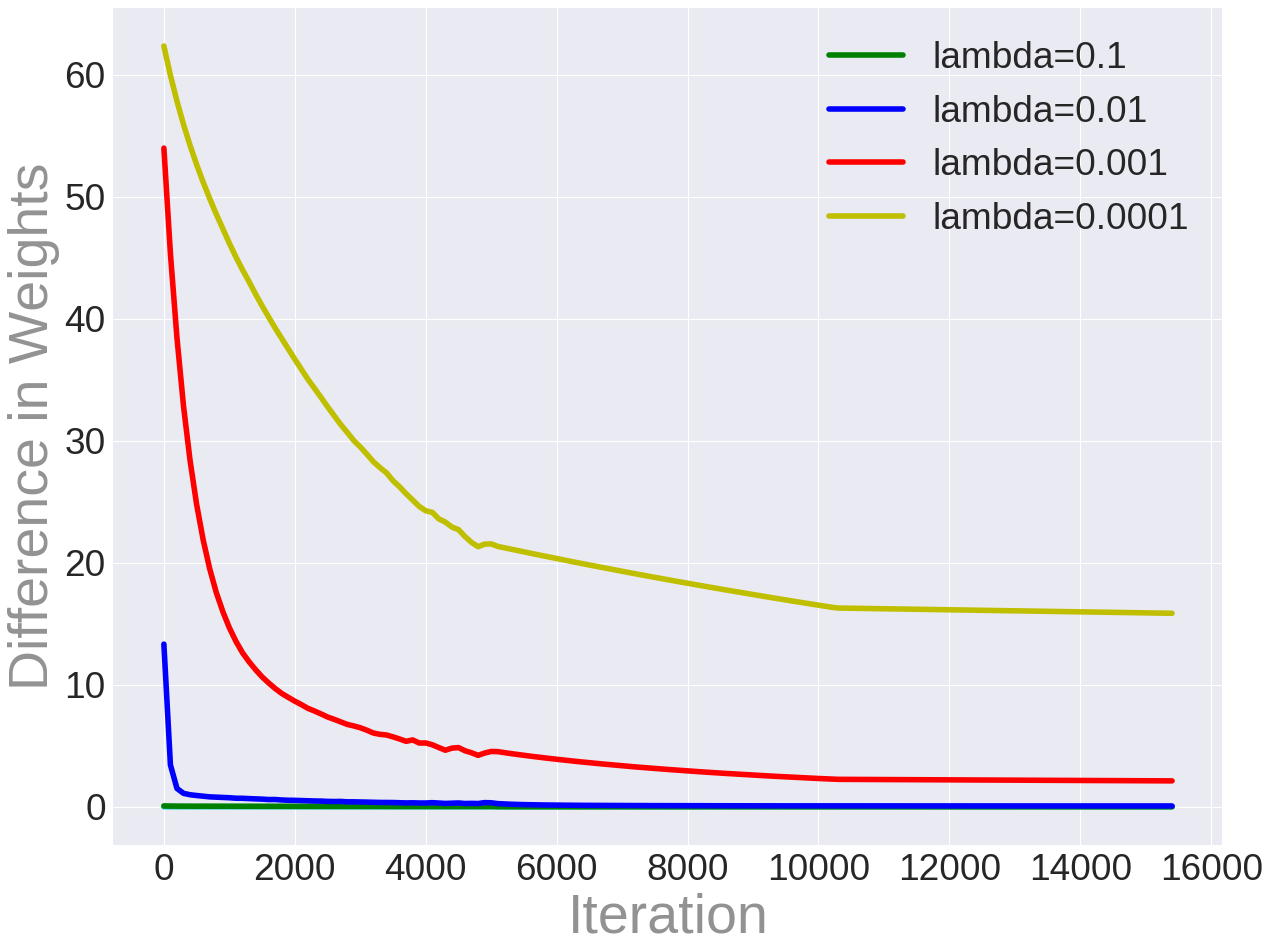

In [43]:
smooth_distance = 20
alpha = 1
line_width = 5.0
size=50

plt.figure(figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title("", size=size)
plt.ylabel("Difference in Weights", size=size, alpha=0.5)
plt.xlabel("Iteration", size=size,alpha=0.5)


############# MTL soft loss 1 #################
lbl = "lambda=1"

y = np.array(mtl_soft_loss_1_diff['mainshared_weights_diff'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='c')

y = np.array(mtl_soft_loss_1_diff['mainshared_weights_diff'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='c')


############# MTL soft loss 0.1 #################
lbl = "lambda=0.1"

y = np.array(mtl_soft_loss_0_1_diff['mainshared_weights_diff'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='g', label=lbl)

y = np.array(mtl_soft_loss_0_1_diff['mainshared_weights_diff'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='g')


############# MTL soft loss 0.01 #################
lbl = "lambda=0.01"

y = np.array(mtl_soft_loss_0_01_diff['mainshared_weights_diff'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='b', label=lbl)

y = np.array(mtl_soft_loss_0_01_diff['mainshared_weights_diff'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='b')


############# MTL soft loss 0.001 #################
lbl = "lambda=0.001"

y = np.array(mtl_soft_loss_0_001_diff['mainshared_weights_diff'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='r', label=lbl)

y = np.array(mtl_soft_loss_0_001_diff['mainshared_weights_diff'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='r')

############# MTL soft loss 0.0001 #################
lbl = "lambda=0.0001"

y = np.array(mtl_soft_loss_0_0001_diff['mainshared_weights_diff'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='y', label=lbl)

y = np.array(mtl_soft_loss_0_0001_diff['mainshared_weights_diff'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([10 * i * 10 + smooth_distance for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='y')

plt.xticks(size=size/1.5)
plt.yticks(size=size/1.5)
#plt.axis(ymax=0.52, ymin=0.36)
plt.legend(loc="best",prop={'size':size/1.5})
plt.tight_layout()
plt.savefig("weight_diff_lambdas.png", dpi=100)
plt.show()